In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('CO2.xlsx')
df.head()

Year      CO2
0  1800  0.00568
1  1801  0.00561
2  1802  0.00555
3  1803  0.00548
4  1804  0.00542

In [3]:
df.tail()

Year   CO2
210  2010  15.6
211  2011  15.6
212  2012  14.8
213  2013  14.7
214  2014  15.1

# Identifying the missing values
We have used the above code to detect if there are any missing values which are being represented by either '?' or blank cell.

In [4]:
flag = False
for i in df.columns.tolist():
    if ('?' in df[i].tolist() or '' in df[i].tolist()):
        flag = True
print(flag)

False


We will now use the df.isnull() method to check if there are 'NaN' (Not a number) or null values in the cells. This method return True if there are such values otherwise false. Let us have a look at the dataframe which will be created.

In [5]:
tmp = df.isnull()
tmp.head(10)

Year    CO2
0  False  False
1  False  False
2  False  False
3  False  False
4  False  False
5  False  False
6  False  False
7  False  False
8  False  False
9  False  False

We will use the value_counts() method to to check the frequency of the values in each column.

In [6]:
for i in tmp.columns.tolist():
    print(tmp[i].value_counts())
    print('')

False    215
Name: Year, dtype: int64

False    215
Name: CO2, dtype: int64



In [7]:
df.shape

(215, 2)

As we can see, we have got no result with 'True' in it.Therefore our Data is clean.

We will now use the df.info() method to get the better idea of our dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    int64  
 1   CO2     215 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5 KB


As mentioned, we have 2 Data Columns(Features), followed by name of the column, no of entries in it, null values if any and the data type.
For example here in this case we have Year as the name of the column, 215 as the number of non null entries in it, not- null stating there is no entry containing null object, and int64 as the data type of the column MODELYEAR.
We can also use df.dtypes method to check out the data type of each column in the dataset.

In [9]:
df.dtypes

Year      int64
CO2     float64
dtype: object

In [10]:
df.describe()

Year         CO2
count   215.000000  215.000000
mean   1907.000000    6.741970
std      62.209324    6.522437
min    1800.000000    0.001750
25%    1853.500000    0.041050
50%    1907.000000    6.390000
75%    1960.500000   11.500000
max    2014.000000   18.200000

In [11]:
pd.DataFrame(df.nunique())

0
Year  215
CO2   170

Checking for null values

In [12]:
nullTable = pd.DataFrame(df.dtypes ).T.rename(index={0: "types"})
nullTable = nullTable.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0: "count"}))
nullTable = nullTable.append(pd.DataFrame(df.isnull().sum() /df.shape[0]*100 ).T.rename(index={0: "%"}))
nullTable

Year      CO2
types  int64  float64
count      0        0
%        0.0      0.0

Checking for Duplicate values

In [13]:
print("There exist  {:,} duplicate values in our data,".format(df.duplicated().sum()))

There exist  0 duplicate values in our data,


In [14]:
from matplotlib import pyplot
from matplotlib import style
from numpy import sqrt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
import itertools
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

# Exploratory Data Analysis & Visualizations
We will now employ the use of df.describe() method, which will compute the basic statistics for all continuous variables.

The result will contain the following things:

* the count or frequency.
* the mean or average.
* the standard deviation (std).
* the minimum value
* the IQR (Interquartile Range: 25%, 50% and 75%)
* the maximum value

# Correlation
A mutual interdependence between two or more things is known as correlation.
We will now check the Correlation between the continuous variables using the df.corr() method.

In [15]:
tmp = df.corr()
tmp

Year       CO2
Year  1.000000  0.951243
CO2   0.951243  1.000000

Now, in this code snippet, we will get the column whose absolute value is correlated to CO2 EMISSIONS by greater than 50%

In [16]:
imp_cols = tmp[abs(tmp['CO2']) > 0.5].index.tolist()
imp_cols

['Year', 'CO2']

# Heat Map
We will draw the heatmap of the important columns below.

<AxesSubplot:>

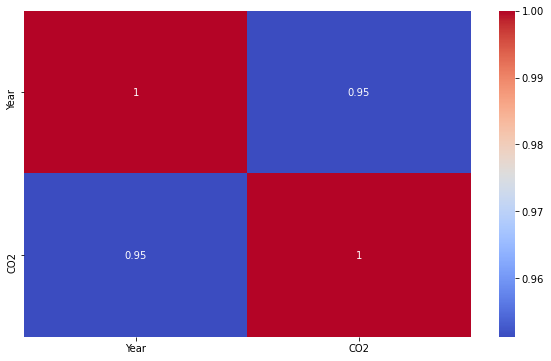

In [17]:
sns.heatmap(df[imp_cols].corr(),cmap='coolwarm',annot=True)

C:\Users\manoj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CO2', ylabel='Density'>

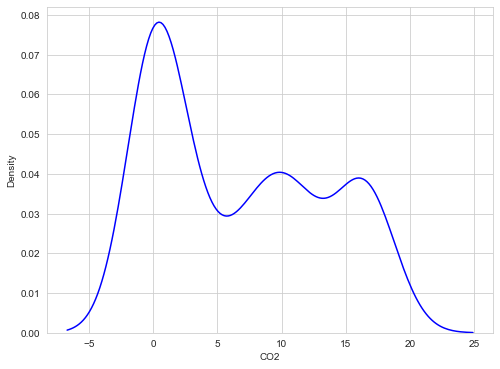

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize = (8, 6))

# plotting only CO2 
sns.distplot(df.CO2, hist = False, color = 'b')

After plotting graph we infer that CO2 is right skewed in CO2 Emission dataset we will perform a necceasry transformation to normalize it.

Skewness: 0.362736


C:\Users\manoj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


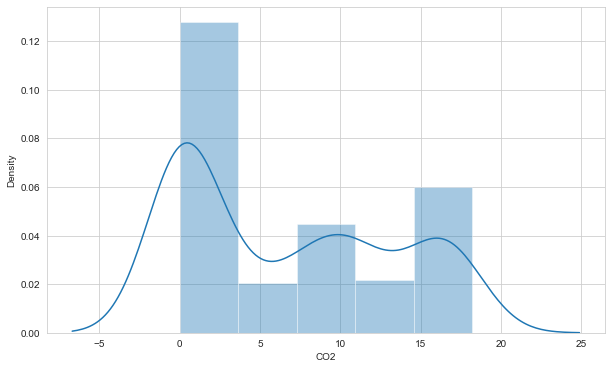

In [19]:
sns.distplot(df['CO2'])
print("Skewness: %f" % df['CO2'].skew())

Kurtosis: -1.417272


C:\Users\manoj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


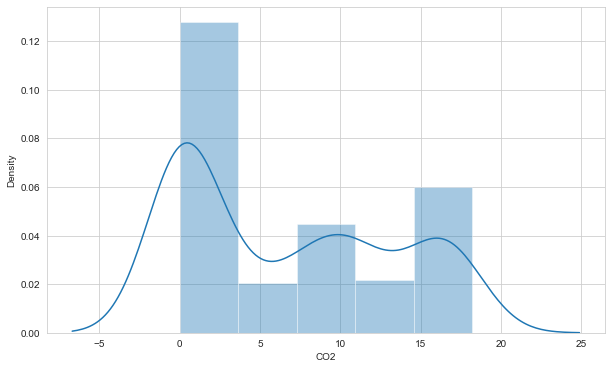

In [20]:
sns.distplot(df['CO2'])
print("Kurtosis: %f" % df['CO2'].kurt())

# Bar Plot

C:\Users\manoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CO2'>

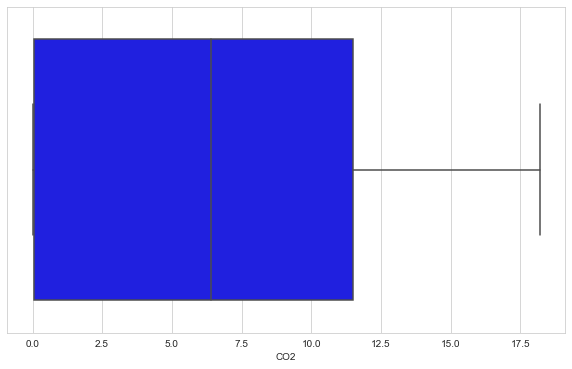

In [21]:
sns.boxplot(df['CO2'],color="blue")

# Scatter Plot

In [22]:
fig = px.scatter(df, x="Year", y="CO2")
fig.update_layout(title_text='CO2 Emission levels vs Year ', xaxis_title="Year", yaxis_title="CO2 Emission Levels",title_x=0.5)
fig.show()

* We can see that till 18th century the CO2 levels are almost 0
* At the beginning of 19th century the CO2 levels started increasing linearly for every 50 years and reached to peak levels in 20th century.

C:\Users\manoj\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



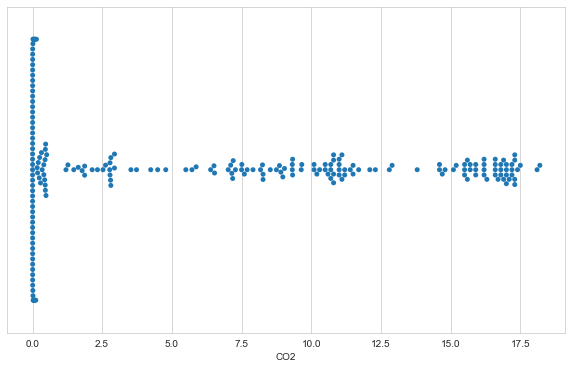

In [23]:
sns.set_style(style="whitegrid")
ax = sns.swarmplot(x=df["CO2"][0:250])

Coverting Year to month format

In [24]:
df['Year'] = pd.to_datetime(df.Year, format = '%Y')
df.set_index('Year', inplace = True)
df.head()

CO2
Year               
1800-01-01  0.00568
1801-01-01  0.00561
1802-01-01  0.00555
1803-01-01  0.00548
1804-01-01  0.00542

# Testing stationary of data

In [25]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

# Graphycally test stationary

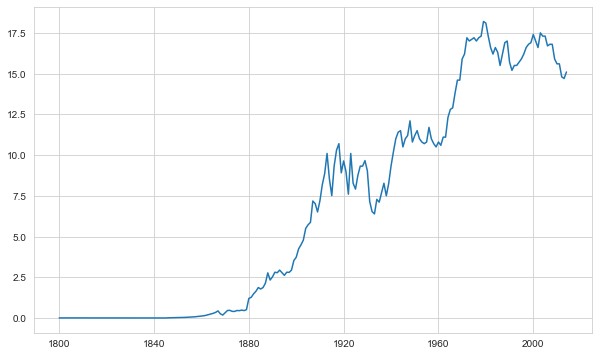

In [26]:
plt.plot(df)

# Test stationary using Dickey-Fuller

In [27]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
    plt.xlabel('Years', fontsize = 10)
    plt.ylabel('CO2 Emissions', fontsize = 10)
    plt.legend(loc='best', fontsize = 10)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 10)
    plt.show(block= True)

In [28]:
def TestStationaryAdfuller(df, cutoff = 0.01):
    x = df['CO2'].values
    df_test = adfuller(x, autolag = 'AIC')
    df_test_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in df_test[4].items():
        df_test_output['Critical Value (%s)'%key] = value
    print(df_test_output)
    if df_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

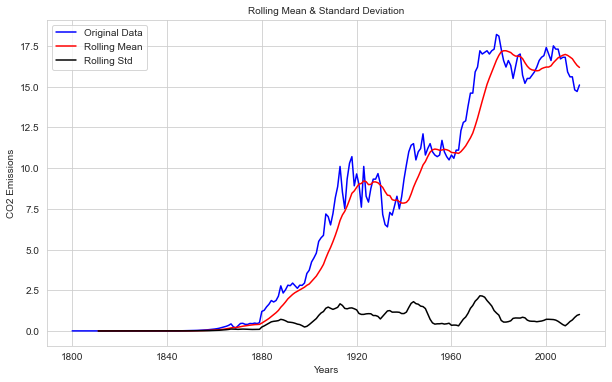

In [29]:
TestStationaryPlot(df)

In [30]:
TestStationaryAdfuller(df)

Test Statistic                  -0.378463
p-value                          0.913633
#Lags Used                       0.000000
Number of Observations Used    214.000000
Critical Value (1%)             -3.461282
Critical Value (5%)             -2.875143
Critical Value (10%)            -2.574020
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Transform the dataset to stationary
* Aggregation – taking average for a time period like monthly/weekly average
* Smoothing – taking rolling averages
* Polynomial Fitting – fit a regression model

# Moving average

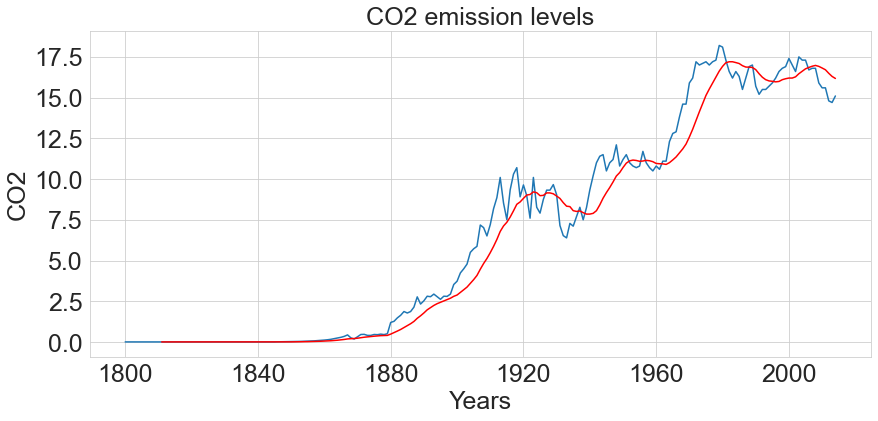

In [31]:
moving_avg = df.rolling(12).mean()
plt.figure(figsize=(14,6))
plt.plot(df)
plt.plot(moving_avg, color='red')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Years', fontsize = 25)
plt.ylabel('CO2', fontsize = 25)
plt.title('CO2 emission levels', fontsize = 25)
plt.show()

# Get the difference between the moving average and the actual CO2 emission levels

In [32]:
df_MovingAverage = df - moving_avg
df_MovingAverage.head(12)

#Remove NAN Values
df_MovingAverage.dropna(inplace=True)
df_MovingAverage.head(10)

CO2
Year                
1811-01-01 -0.000356
1812-01-01 -0.000361
1813-01-01 -0.000366
1814-01-01 -0.000379
1815-01-01 -0.000401
1816-01-01 -0.000420
1817-01-01 -0.000446
1818-01-01 -0.000460
1819-01-01 -0.000490
1820-01-01 -0.000507

In [33]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(ts):
    
    #Determing rolling statistics
    moving_avg = ts.rolling(window=12).mean()
    moving_std = ts.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

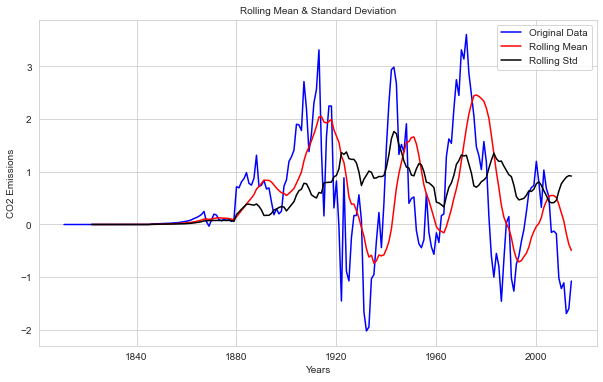

In [34]:
TestStationaryPlot(df_MovingAverage)

In [35]:
TestStationaryAdfuller(df_MovingAverage)

Test Statistic                  -4.702826
p-value                          0.000083
#Lags Used                       7.000000
Number of Observations Used    196.000000
Critical Value (1%)             -3.464161
Critical Value (5%)             -2.876402
Critical Value (10%)            -2.574692
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


# Exponentail weighted moving average

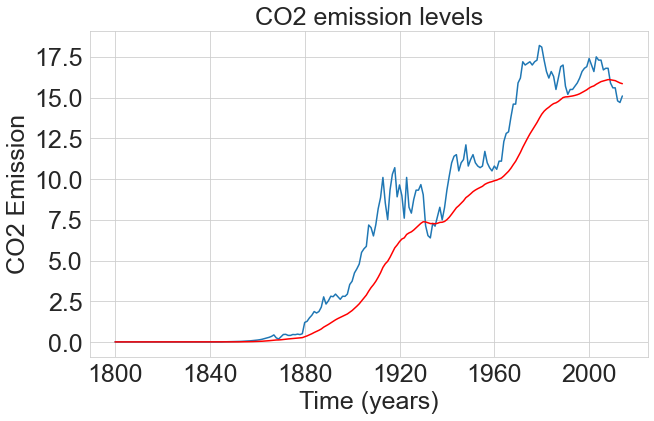

In [36]:
#df_exp_wighted_avg = df.ewm(halflife=12, min_periods=0, adjust=True).mean()
#plt.plot(df)
#plt.plot(df_exp_wighted_avg, color='red')

df_exp_wighted_avg = df.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(df)
plt.plot(df_exp_wighted_avg, color='red')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Time (years)', fontsize = 25)
plt.ylabel('CO2 Emission', fontsize = 25)
plt.title('CO2 emission levels', fontsize = 25)
plt.show()

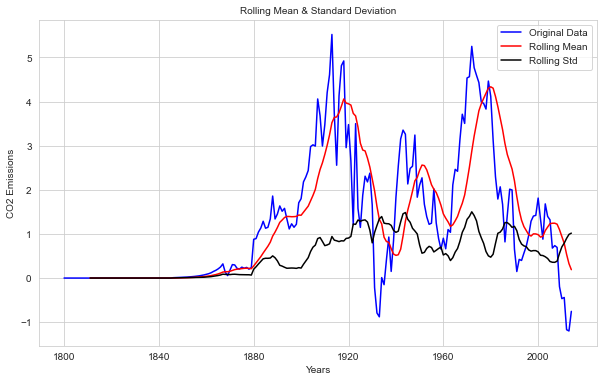

In [37]:
df_ewma_diff = df - df_exp_wighted_avg
TestStationaryPlot(df_ewma_diff)

# Eliminating trend and seasonality: Differencing

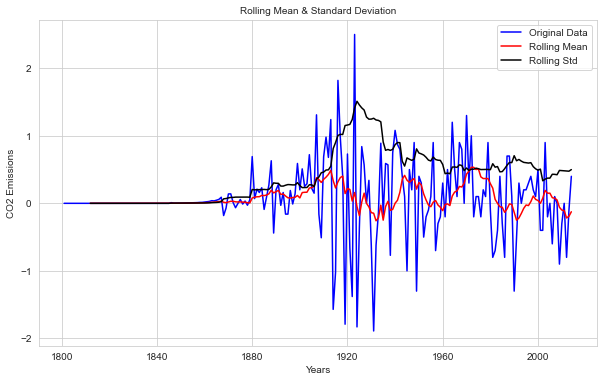

In [38]:
df_first_difference = df - df.shift(1)
TestStationaryPlot(df_first_difference.dropna(inplace=False))
#plt.plot(df_first_Difference)

In [39]:
TestStationaryAdfuller(df_first_difference.dropna(inplace=False))

Test Statistic                  -3.780005
p-value                          0.003119
#Lags Used                      15.000000
Number of Observations Used    198.000000
Critical Value (1%)             -3.463815
Critical Value (5%)             -2.876251
Critical Value (10%)            -2.574611
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


The first difference improves the stationarity of the series significantly. Let us use also the seasonal difference to remove the seasonality of the data and see how that impacts stationarity of the data.

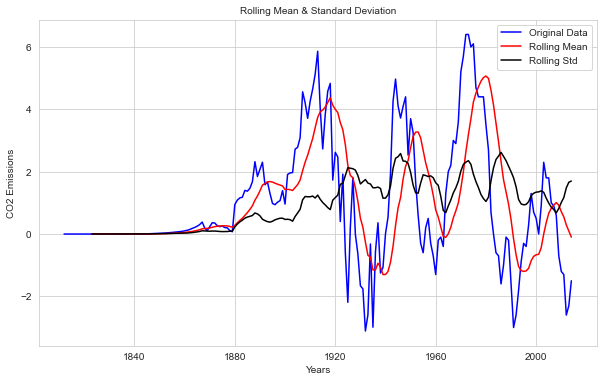

Test Statistic                  -1.847905
p-value                          0.356951
#Lags Used                      15.000000
Number of Observations Used    187.000000
Critical Value (1%)             -3.465812
Critical Value (5%)             -2.877123
Critical Value (10%)            -2.575077
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [40]:
df_seasonal_difference = df - df.shift(12)  
TestStationaryPlot(df_seasonal_difference.dropna(inplace=False))
TestStationaryAdfuller(df_seasonal_difference.dropna(inplace=False))

Compared to the original data the seasonal difference also improves the stationarity of the series. The next step is to take the first difference of the seasonal difference.

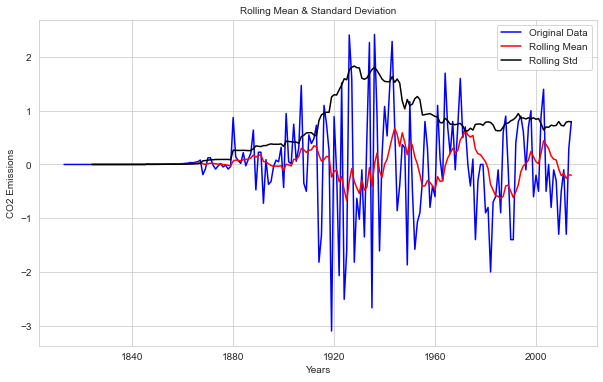

In [41]:
df_seasonal_first_difference = df_first_difference - df_first_difference.shift(12)  
TestStationaryPlot(df_seasonal_first_difference.dropna(inplace=False))

In [42]:
TestStationaryAdfuller(df_seasonal_first_difference.dropna(inplace=False))

Test Statistic                -6.831718e+00
p-value                        1.886305e-09
#Lags Used                     1.400000e+01
Number of Observations Used    1.870000e+02
Critical Value (1%)           -3.465812e+00
Critical Value (5%)           -2.877123e+00
Critical Value (10%)          -2.575077e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


Now, if we look the Test Statistic and the p-value, taking the seasonal first difference has made our the time series dataset stationary. This differencing procedure could be repeated for the log values, but it didn’t make the dataset any more stationary.

# Eliminating trend and seasonality: Decomposing

In this technique, it statrating by modeling both trend and seasonality and removing them from the model.

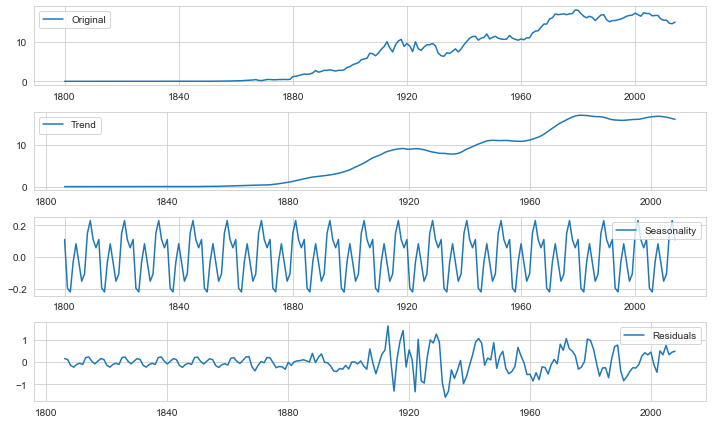

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df, period=12, model="additive")

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

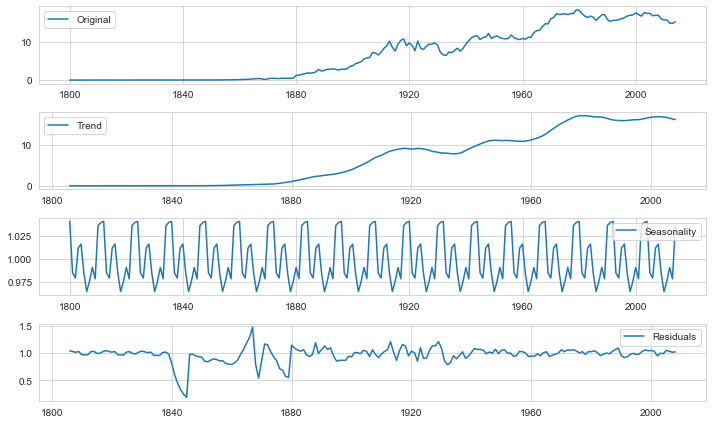

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df, period=12, model="multiplicative")

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

From the Decomposition plots, we can say there is a mulitplicative seasonality in our data

# Building ARIMA model

### ACF and PACF Charts

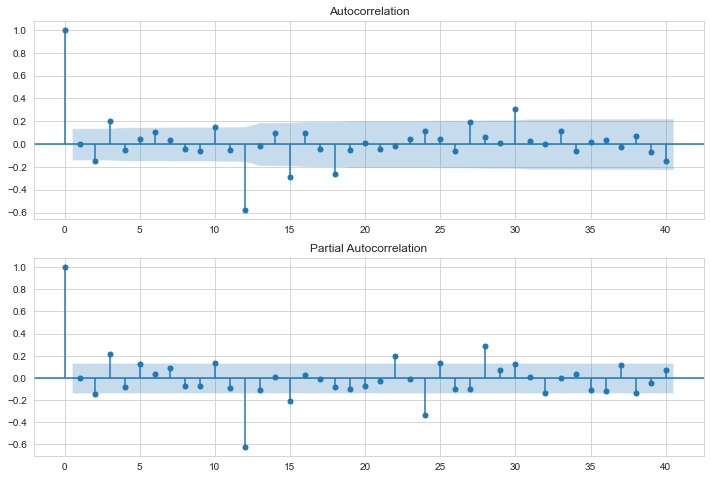

In [45]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

# Grid search

To find the optimal parameters for ARIMA models using the graphical method is not trivial and it is time consuming. We will select the optimal parameter values systematically using the grid search (hyperparameter optimization) method. The grid search iteratively explore different combinations of the parameters. For each combination of parameters, we will fit a new seasonal ARIMA model with the SARIMAX() function from the statsmodels module and assess its overall quality. Once we have explored the entire landscape of parameters, our optimal set of parameters will be the one that yields the best performance for our criteria of interest. Let's begin by generating the various combination of parameters that we wish to assess:

In [46]:
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)


In [47]:
print(pdq)
print(pdq_x_QDQs)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


When evaluating and comparing statistical models fitted with different parameters, each can be ranked against one another based on how well it fits the data or its ability to accurately predict future data points. We will use the AIC (Akaike Information Criterion) value, which is conveniently returned with ARIMA models fitted using statsmodels. The AIC measures how well a model fits the data while taking into account the overall complexity of the model. A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit. The lowest AIC refore, we are interested in finding the model that yields the lowest AIC value.

The order argument specifies the (p, d, q) parameters, while the seasonal_order argument specifies the (P, D, Q, S) seasonal component of the Seasonal ARIMA model. After fitting each SARIMAX()model, the code prints out its respective AIC score.

Notes on AIC score: AIC will choose the best model from a set(The “best” model will be the one that neither under-fits nor over-fits.),then consider running a hypothesis test to figure out the relationship between the variables in your model and the outcome of interest.

In [48]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [49]:
a=[]
b=[]
c=[]
wf=pd.DataFrame()

In [50]:
for param in pdq:
    for param_seasonal in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            a.append(param)
            b.append(param_seasonal)
            c.append(results.aic)
        except:
            continue
wf['pdq']=a
wf['pdq_x_QDQs']=b
wf['aic']=c
print(wf[wf['aic']==wf['aic'].min()])

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1567.9628048847767
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1282.7583402605571
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:888.0644165901854
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:849.0337226932495
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:876.3013822726497
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:870.7678085216164
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:852.459186414344
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:842.5493640275856
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1286.1096976501508
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1025.218189485075
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:677.2842636188076
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:650.0093952099778
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:674.585053711791
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:667.0608028212122
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:654.9199066396397
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:652.0133854921769
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:354.3828985419661
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:347.6187533155511
ARIMA(0, 

SARIMAX(0, 1, 0)x(0, 0, 1, 12) yields the lowest AIC value of 347.618753. Therefore, we will consider this to be optimal option out of all the parameter combinations.W e have identified the set of parameters that produces the best fitting model to our time series data. We can proceed to analyze this particular model in more depth.

In [51]:
mod = sm.tsa.statespace.SARIMAX(df, 
                                order=(0,1,0), 
                                seasonal_order=(0,0,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                  CO2   No. Observations:                  215
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 12)   Log Likelihood                -171.809
Date:                              Sat, 31 Jul 2021   AIC                            347.619
Time:                                      14:15:49   BIC                            354.225
Sample:                                  01-01-1800   HQIC                           350.292
                                       - 01-01-2014                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.0465      0.053     -0.870      0.385      -0.151       0.058
sigma2         0.32

The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. The P>|z| column informs us of the significance of each feature weight. Here, each weight has a p-value close to 0, so it is reasonable to include the features in our model.

When fitting seasonal ARIMA models, it is important to run model diagnostics to ensure that none of the assumptions made by the model have been violated. First, we get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.

<AxesSubplot:xlabel='Year'>

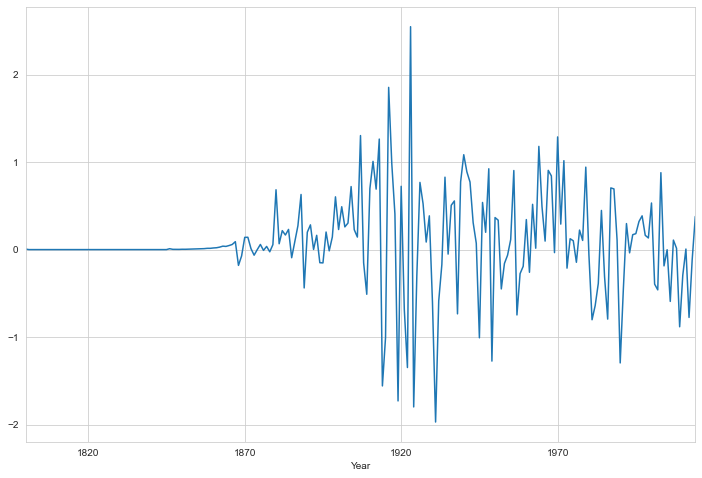

In [52]:
results.resid.plot(figsize=(12,8))

In [53]:
print(results.resid.describe())

count    215.000000
mean       0.073988
std        0.546242
min       -1.970424
25%       -0.005525
50%        0.004696
75%        0.244876
max        2.546877
dtype: float64


The figure displays the distribution of the residual errors. It shows a little bias in the prediction. Next, we get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.

<AxesSubplot:ylabel='Density'>

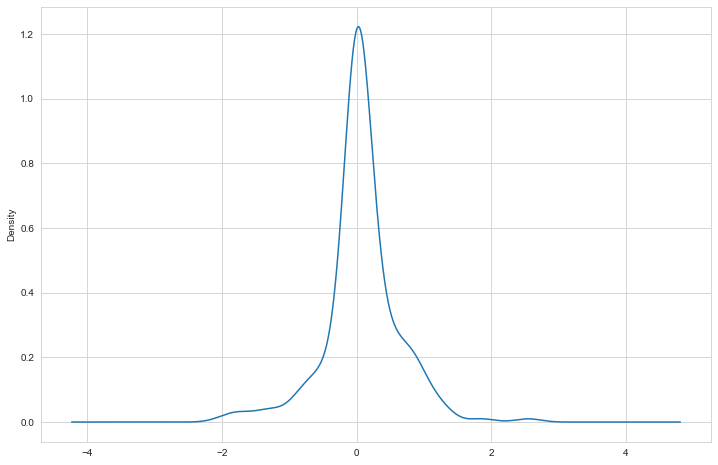

In [54]:
results.resid.plot(figsize=(12,8),kind='kde')

The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.

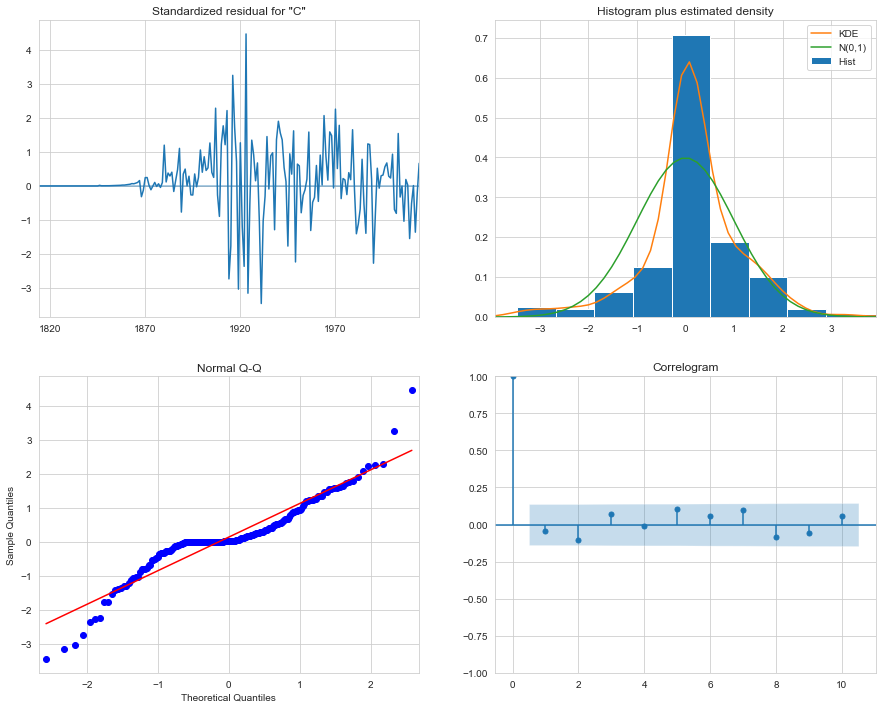

In [55]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

The model diagnostic suggests that the model residual is normally distributed based on the following:

* In the top right plot, the red KDE line follows closely with the N(0,1) line. Where, N(0,1) is the standard notation for a normal distribution with mean 0 and standard deviation of 1. This is a good indication that the residuals are normally distributed. The forecast errors deviate somewhat from the straight line, indicating that the normal distribution is not a perfect model for the distribution of forecast errors, but it is not unreasonable.
* The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution. Again, this is a strong indication that the residuals are normally distributed.
* The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

Those observations lead us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values.

# Validating prediction

We have obtained a model for our time series that can now be used to produce forecasts. We start by comparing predicted values to real values of the time series, which will help us understand the accuracy of our forecast. The get_prediction() and conf_int() attributes allow us to obtain the values and associated confidence intervals for forecasts of the time series.

In [56]:
#from datetime import timedelta

TypeError: The DTypes <class 'numpy.dtype[float64]'> and <class 'numpy.dtype[datetime64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

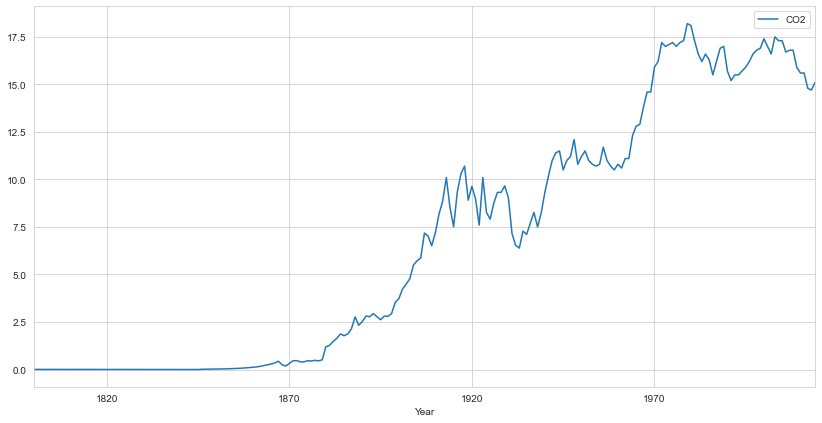

In [57]:
pred = results.get_prediction(start = pd.to_datetime('2014-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df['1800':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Year')
ax.set_ylabel('CO2')
plt.legend()
plt.show()

#pred = results.get_prediction(start = 214, end = 221, dynamic=False)
#pred_ci = pred.conf_int()
#pred_ci.head()

The dynamic=False argument ensures that we produce one-step ahead forecasts, meaning that forecasts at each point are generated using the full history up to that point.

We can plot the real and forecasted values of the CO2 emission time series to assess how well the model fits.

In [59]:
df_forecast = pred.predicted_mean
df_truth = df['CO2']
mse = ((df_forecast - df_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 0.14
The Root Mean Squared Error of our forecasts is 0.38


In [60]:
df_pred_concat = pd.concat([df_truth, df_forecast])

The goal of developing the model is to get a good quality predictive power using dynamic forecast. That is, we use information from the time series up to a certain point, and after that, forecasts are generated using values from previous forecasted time points as follows:

In [61]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2013-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

From, plotting the observed and forecasted values of the time series, we see that the overall forecasts are accurate even when we use the dynamic forecast. All forecasted values (red line) match closely to the orginal observed (blue line) data, and are well within the confidence intervals of our forecast.

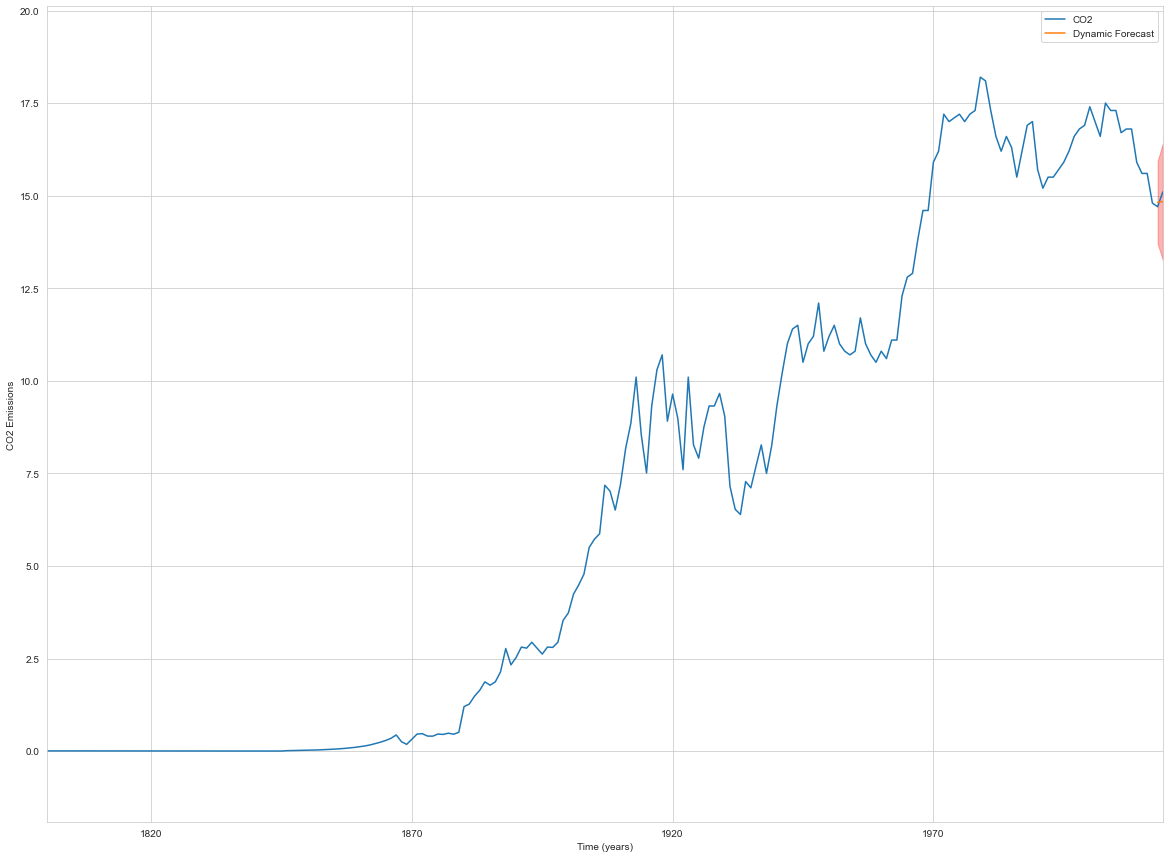

In [62]:
ax = df['1800':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], 
                color='red', 
                alpha=.3)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2014-01-01'), 
                 df.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('CO2 Emissions')

plt.legend()
plt.show()

In [63]:
# Extract the predicted and true values of our time series
#df_forecast = pred_dynamic.predicted_mean
#df_orginal = df['CO2']

# Compute the mean square error
#mse = ((df_forecast - df['CO2']) ** 2).mean()
#print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
#print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'.format(round(np.sqrt(mse), 2)))

# Forecasting

In [64]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps= 25)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci.head()

lower CO2  upper CO2
2015-01-01  13.944308  16.173958
2016-01-01  13.491191  16.644392
2017-01-01  13.136939  16.998805
2018-01-01  12.865756  17.325056
2019-01-01  12.597538  17.583186

We can use the output of this code to plot the time series and forecasts of its future values.

### Saving Forecasting Results to CSV file

In [65]:
forecast_ci.to_csv("Forecasted_CO2.CSV")

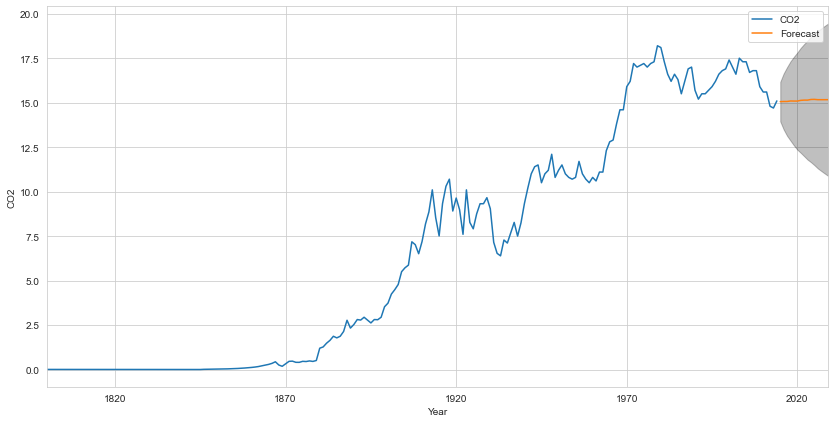

In [66]:
pred_uc = results.get_forecast(steps=15)
pred_ci = pred_uc.conf_int()
ax = df.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Year')
ax.set_ylabel('CO2')
plt.legend()
plt.show()


#ax = df.plot(label='observed', figsize=(20, 15))
#forecast.predicted_mean.plot(ax=ax, label='Forecast')
#ax.fill_between(forecast_ci.index,
#                forecast_ci.iloc[:, 0],
#                forecast_ci.iloc[:, 1], color='g', alpha=.4)
#ax.set_xlabel('Time (year)')
#ax.set_ylabel('CO2 Emission level')
#
#plt.legend()
#plt.show()

Both the forecast and associated confidence interval that we have generated can now be used to further explore and understand the time series. The forecast shows that the CO2 emissions are expected to continue increasing.

# Conclusion

In this notebook, I have explored how to retrieve CSV dataset, how to transform the dataset into times series, testing if the time series is stationary or not using graphical and Dickey-Fuller test statistic methods, how to transform time series to stationary, how to find optimal parameters to build SARIMA model using grid search method, diagnosing time series prediction, validating the predictive power, forecasting 10 year future CO2 emissions for an organization

In [71]:
import pickle
pickle.dump(mod, open("arima.pkl", 'wb'))